## 1. img copy

In [2]:
import cv2
import numpy as np

In [ ]:
src=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)

#dst=src # 참조
dst=src.copy() # 복사
dst[100:400, 200:300] = 0

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 2. color split merge

In [ ]:
src=cv2.imread('./data/lena.jpg')
dst=cv2.split(src) # 채널 분리 -> dst[0]:B, dst[1]:G, dst[2]:R
print(type(dst))
print(type(dst[0]))

cv2.imshow('image', src)
cv2.imshow('blue', dst[0])
cv2.imshow('green',dst[1])
cv2.imshow('red',dst[2])
cv2.waitKey()
cv2.destroyAllWindows()

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
src=cv2.imread('./data/lena.jpg')
b,g,r=cv2.split(src)
dst=cv2.merge([b,g,r]) # 채널 합침

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 3. color convert

In [ ]:
src=cv2.imread('./data/lena.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

cv2.imshow('src',src)
cv2.imshow('gray',gray)
cv2.imshow('uCrCv',yCrCv)
cv2.imshow('hsv',hsv)

cv2.waitKey()
cv2.destroyAllWindows()

## 4. transformation(기하 변환)

In [13]:
src=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
print(src.shape)

dst=cv2.resize(src,dsize=(320,240))
dst2=cv2.resize(src,dsize=(0,0), fx=1.5, fy=1.2) # fx,fy는 상대 크기

cv2.imshow('dst',src)
cv2.imshow('dst2',dst)
cv2.waitKey()
cv2.destroyAllWindows()

(512, 512)


In [17]:
import imutils
src=cv2.imread('./data/lena.jpg')
rows,cols,channels=src.shape

dst1=imutils.translate(src,10,30) # 이동 
dst2=imutils.rotate(src,angle=10,center=(rows/2,cols/2)) # 센터를 중심으로 10도 만큼 회전
dst3=imutils.resize(src,width=1000,height=1000) # 리사이즈

cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)

cv2.waitKey()
cv2.destroyAllWindows()

## 5. thresholding

In [3]:
src=cv2.imread('./data/heart10.png',cv2.IMREAD_GRAYSCALE)
ret, dst = cv2.threshold(src,120,255,cv2.THRESH_BINARY) # BINARY를 썼으니 120보다 크면 MAX(255), 아니면 0으로
print('ret=',ret)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

ret= 120.0


In [5]:
ret, dst = cv2.threshold(src,120,255,cv2.THRESH_BINARY)
ret2, dst2 = cv2.threshold(src,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # OTSU로 임계치를 구함, 앞의 200은 무시됨
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 6. Histogram stretching

In [21]:
from matplotlib import pyplot as plt

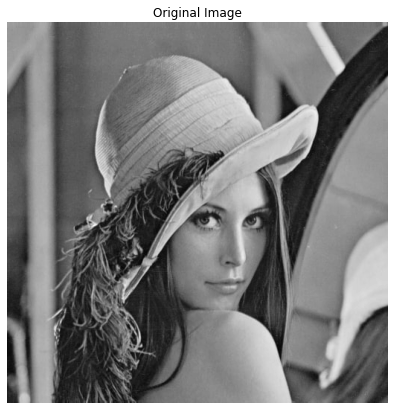

In [34]:
src=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(7,7))
plt.imshow(src,cmap='gray')

plt.axis('off')
plt.title('Original Image')
plt.show()

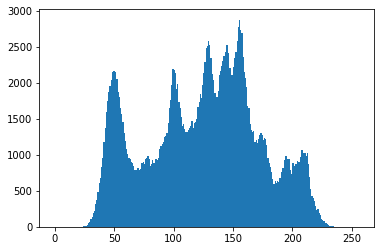

In [35]:
# flatten = 2차원 영상을 1차원 형태로 만듦 -> 히스토그램 제작 
plt.hist(src.flatten(),range=[0,256],bins=256)
plt.show()

In [36]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(src)
print('Gmin =',min_val)
print('Gmax =',max_val)

Gmin = 20.0
Gmax = 251.0


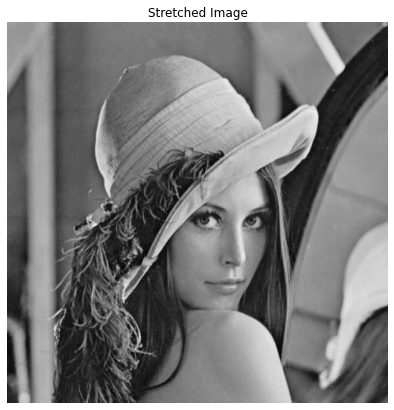

In [38]:
dst=((src-min_val)*255) / (max_val-min_val)
dst=cv2.convertScaleAbs(dst)

plt.figure(figsize=(7,7))
plt.imshow(dst,cmap='gray')
plt.axis('off')
plt.title('Stretched Image')
plt.show()

In [ ]:
# 컬러 영상을 처리할 때는 split해서 명도만 stretching하고 다시 merge하는 작업을 진행함